In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
bb_theory = pd.read_csv("big_bang_theory_dataset.csv")

In [ ]:
#sheldon = bb_theory[bb_theory["Speaker"]=="Sheldon"]["Text"]
#sheldon_call_penny = sheldon[sheldon["Text"] == "Penny."]
#sheldon_call_penny

In [ ]:
sheldon = bb_theory[bb_theory["Speaker"]=="Sheldon"]
sheldon1 = pd.DataFrame(sheldon)

In [ ]:
def said_penny(x):
    if 'Penny.' in x:
        return True
    else:
        return False

In [ ]:
said_penny(sheldon1.iloc[12]["Text"])

True

In [ ]:
said_penny(sheldon1["Text"])

False

In [ ]:
sheldon1["p"] = said_penny(sheldon1["Text"])

In [ ]:
said_penny(sheldon1.iloc[1]["Text"])

False

In [ ]:
sheldon1["Penny1"] = sheldon1["Text"].apply(lambda x:said_penny)

In [ ]:
sheldon_call_penny = sheldon1[sheldon1["Text"] == "Penny."]
sheldon_call_penny

,Unnamed: 0,Location,Scene,Text,Speaker,Season,p,Penny1
1722,1722,The stairs,Sheldon is playing on his computer at the end...,Penny.,Sheldon,2,False,<function said_penny at 0x0000018F8933A700>
2477,2477,Penny’s apartment,NaN,Penny.,Sheldon,2,False,<function said_penny at 0x0000018F8933A700>
13029,13029,At Penny’s door,"Leonard knocks three times,",Penny.,Sheldon,4,False,<function said_penny at 0x0000018F8933A700>
16842,16842,Outside Penny’s door,NaN,Penny.,Sheldon,2,False,<function said_penny at 0x0000018F8933A700>
26974,26974,Penny’s apartment,NaN,Penny.,Sheldon,2,False,<function said_penny at 0x0000018F8933A700>
36322,36322,Penny’s apartment door,"Sheldon knocks three times,",Penny.,Sheldon,5,False,<function said_penny at 0x0000018F8933A700>


(array([1., 0., 2., 0., 0., 1., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

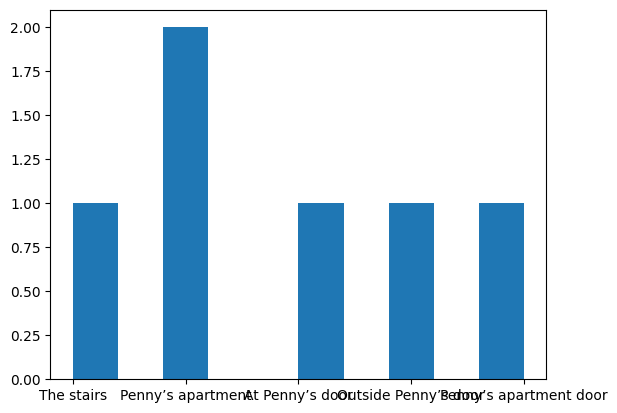

In [ ]:
location = sheldon_call_penny["Location"]
plt.hist(location)

(array([4., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

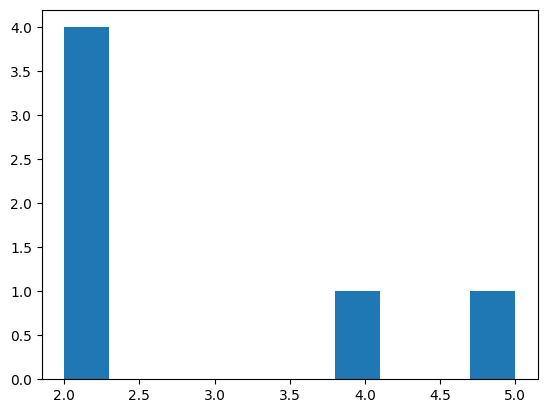

In [ ]:
season = sheldon_call_penny["Season"]
plt.hist(season)

(array([200.,  43.,  31.,  18.,  18.,  15.,  10.,   8.,  13.,  11.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

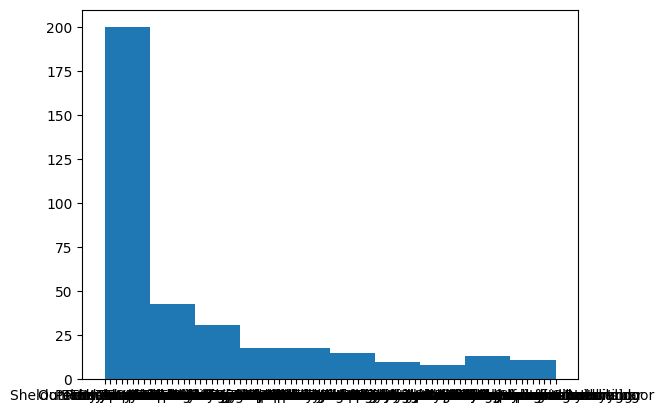

In [ ]:
sheldon1["said_penny"] = sheldon1["Text"].str.contains("Penny",regex=True)
sheldon2 = sheldon1[sheldon1["said_penny"]==True]
plt.hist(sheldon2["Location"])

*Ejercicio 2*

Como son tantas localizaciones distintas, voy a hacer varios gráficos

In [ ]:
y = bb_theory["Location"]
x = bb_theory["Speaker"]

In [ ]:
x.unique()


array(['Leonard', 'Sheldon', 'Howard', 'Penny', 'Raj'], dtype=object)

In [ ]:
y.unique()

array(['The apartment', 'The room in the basement',
       'Sheldon and Amy’s bedroom', 'A cinema',
       'Webcam conversation between Bernadette’s Office and the International Space Station',
       'Penny’s bedroom', 'The same', 'The escape room', 'The cafeteria',
       'The hallway', 'The foyer', 'The Physics Bowl', 'The memorial',
       'The university cafeteria', 'The comic book store', 'The store',
       'Moments later', 'The living room',
       'Lobby of the apartment building', 'The next morning',
       'Penny’s car', 'Penny’s apartment', 'The stairwell',
       'The steam tunnel', 'Leonard’s laboratory', 'Amy’s apartment',
       'Howard and Bernadette’s Bedroom', 'Penny’s apartment door',
       'Penny’s door', 'Sheldon’s office', 'Sheldon’s bedroom',
       'The Apartment', 'Howard and Bernadette’s bedroom',
       'Howard’s bedroom', 'Leonard and Penny are in bed',
       'The restaurant', 'Later still', 'Outside Sheldon’s bedroom',
       'The dining car', 'The livin

In [ ]:
len(y.unique())

522

In [ ]:
bb_theory["location1"] = bb_theory["Location"].str.lower()

In [ ]:
len(bb_theory["location1"].unique())

506

(array([3415.,    0., 4147.,    0.,    0., 1131.,    0., 2103.,    0.,
        1085.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

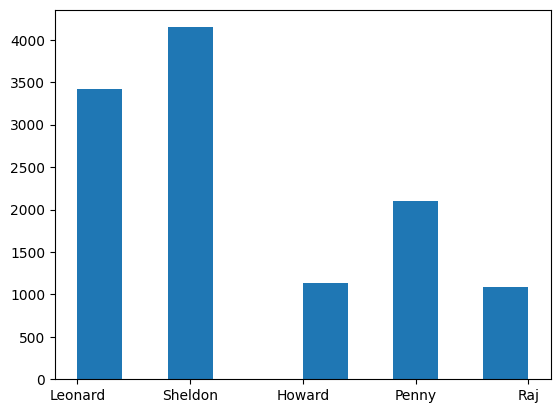

In [ ]:
apartment = bb_theory[bb_theory["location1"]=="the apartment"]
plt.hist(apartment["Speaker"])

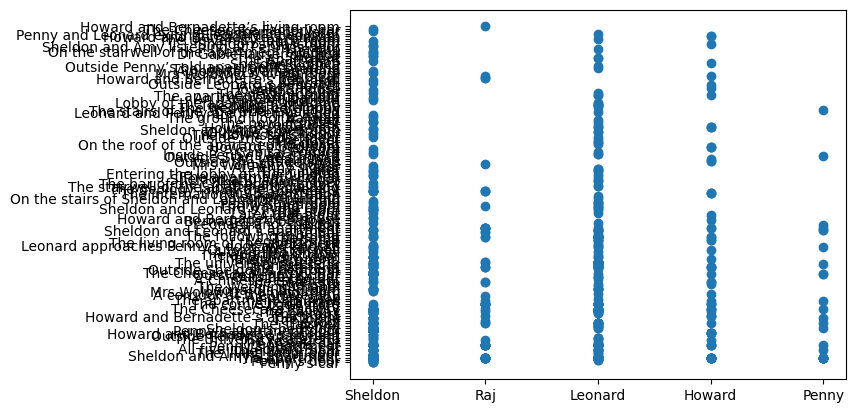

In [ ]:
bb_theory["penny"] = bb_theory["Text"].str.contains("Penny",regex=True)
bb_theory2 = bb_theory[bb_theory["penny"] == True]
plt.scatter(bb_theory2["Speaker"],bb_theory2["Location"])

*Ejercicio 3*

In [ ]:
bb_theory["Season"].unique()

array([ 3,  5,  6, 10,  2,  8,  1,  7,  4,  9], dtype=int64)

In [ ]:
bb_theory["penny"] = bb_theory["Text"].str.contains("Penny",regex=True)
base1 = pd.DataFrame(bb_theory.groupby(["Speaker","Season"])["penny"].sum())

In [ ]:
target = list(base1.index)

In [ ]:
y = base1.penny

In [ ]:
X1 = pd.DataFrame(list(base1.index))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
#y_pred = logreg.predict(X_test)

In [ ]:
X_train

,0,1
32,Raj,3
34,Raj,5
19,Leonard,10
46,Sheldon,7
25,Penny,6
13,Leonard,4
6,Howard,7
45,Sheldon,6
42,Sheldon,3
24,Penny,5


In [ ]:
logreg.fit(X, y)